In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h5py
import numpy as np
import tensorflow as tf
import healpy as hp
import matplotlib.pyplot as plt
from time import time
from icecream import ic

from msfm.utils import tfrecords, survey, pipelines
from msfm.utils.input_output import read_yaml

from kids1000_analysis import data, constants, input_pipeline

Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.
Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-02-06 16:30:00.327151: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-06 16:30:00.327451: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
conf_dir = "../../configs/config.yaml"
conf = read_yaml(conf_dir)

# repo_dir = "/cluster/home/athomsen/py3_10/repos/multiprobe-simulation-forward-model"
repo_dir = "/Users/arne/git/multiprobe-simulation-forward-model"
# tfr_pattern = "/cluster/scratch/athomsen/CosmoGrid/v1/fiducial/DESy3_fiducial_???.tfrecord"
tfr_pattern = "/Users/arne/data/DESY3/tfrecords/v1/DESy3_fiducial_000.tfrecord"

n_labels = 7
# for my pipeline
pert_labels = conf["analysis"]["fiducial"]["perturbations"]["labels"][:n_labels]
# for Janis' pipeline
tags = [0]
for i in range(int((n_labels - 1)/2)):
    tags.append(2 * i + 1)
    tags.append(2 * i + 2)

batch_size = 10
examples_shuffle_buffer = 10
n_readers = 4
n_prefetch = 3

### my pipeline

In [41]:
my_dset = pipelines.get_train_dset(
    conf,
    repo_dir,
    tfr_pattern,
    pert_labels,
    i_noise=0,
    batch_size=batch_size,
    examples_shuffle_buffer=examples_shuffle_buffer,
    n_readers=n_readers,
    n_prefetch=n_prefetch,
)

# my_dset = my_dset.take(10).cache()

print(my_dset.element_spec)

23-02-06 16:06:12    survey.py INF   Loaded pixel file 
(TensorSpec(shape=(70, 463872, 4), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.int64, name=None))


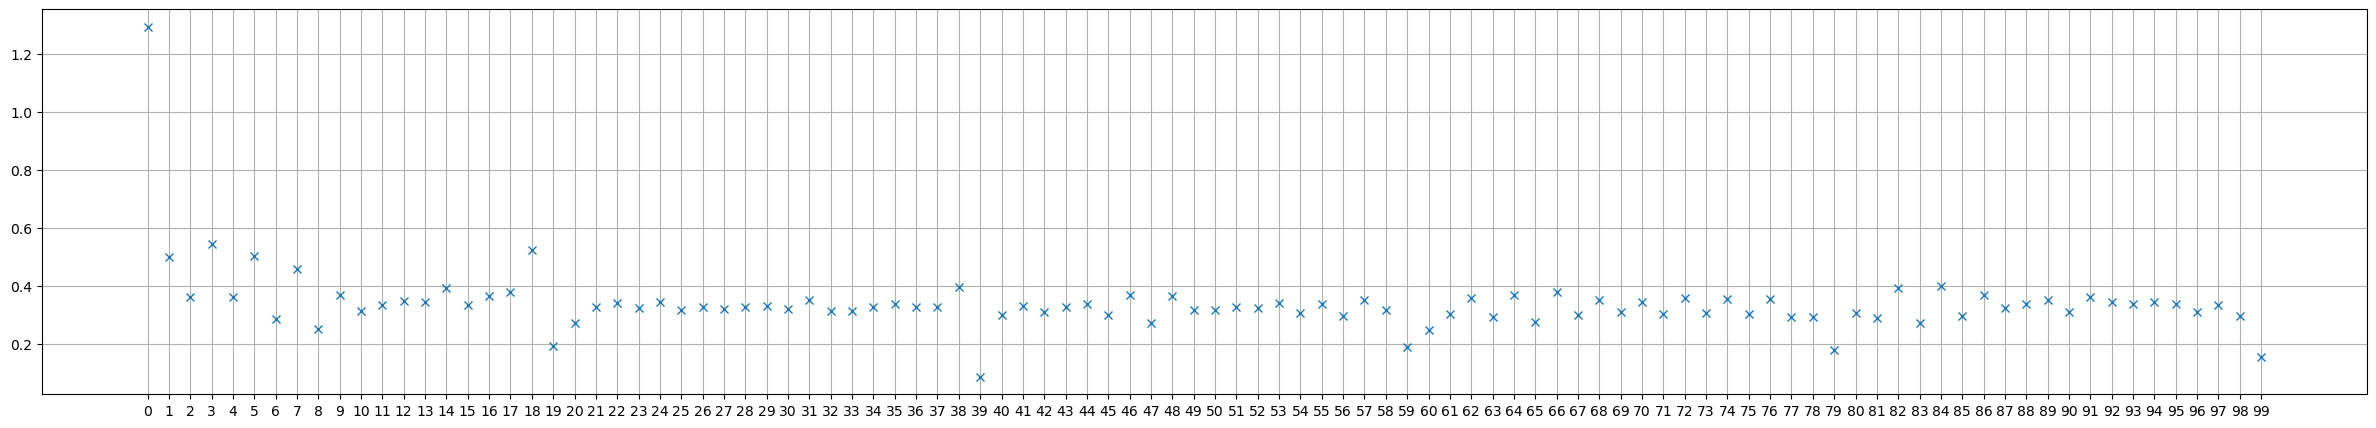

In [42]:
t0 = time()
delta_t = []
for x in my_dset.take(100):
    t1 = time()
    delta_t.append(t1 - t0)
    t0 = t1

fig, ax = plt.subplots(figsize=(30, 5))
ax.plot(delta_t, marker="x", linestyle="")
ax.set_xticks(np.arange(len(delta_t)))
ax.grid(True)

In [6]:
pert_labels = conf["analysis"]["fiducial"]["perturbations"]["labels"][:3]
my_dset = pipelines.get_train_dset(
    conf,
    repo_dir,
    tfr_pattern,
    pert_labels,
    i_noise=0,
    batch_size=batch_size,
    examples_shuffle_buffer=1,
    n_readers=n_readers,
    n_prefetch=1,
)

print(my_dset.element_spec)

for x in my_dset.take(100):
    pass

23-02-06 16:31:40    survey.py INF   Loaded pixel file 
(TensorSpec(shape=(30, 463872, 4), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.int64, name=None))


In [5]:
pert_labels = conf["analysis"]["fiducial"]["perturbations"]["labels"]
my_dset = pipelines.get_train_dset(
    conf,
    repo_dir,
    tfr_pattern,
    pert_labels,
    i_noise=0,
    batch_size=batch_size,
    examples_shuffle_buffer=1,
    n_readers=n_readers,
    n_prefetch=1,
)

print(my_dset.element_spec)

for x in my_dset.take(100):
    pass

23-02-06 16:30:48    survey.py INF   Loaded pixel file 
(TensorSpec(shape=(150, 463872, 4), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.int64, name=None))


### kids pipeline

In [8]:
kids_dset = input_pipeline.get_train_dset(
    batch_size=batch_size,
    signal_file_patern="/Users/arne/data/KiDS1000/fiducial/fiducial_data_000.tfrecord",
    noise_file_patern="/Users/arne/data/KiDS1000/fiducial/noise_data_000.tfrecord",
    data_file="/Users/arne/data/KiDS1000/KiDS1000_pixel_data.hdf5",
    with_bary=False,
    node_id=0,
    n_node=1,
    num_readers=n_readers,
    tags=3,
    signal_shuffle_buffer=examples_shuffle_buffer,
    noise_shuffle_buffer=examples_shuffle_buffer,
    prefetch=n_prefetch
)

print(kids_dset.element_spec)
i = 0
for x in kids_dset.take(100):
    if i == 0:
        print(x.shape)
    i += 1

TensorSpec(shape=(None, 149504, 10), dtype=tf.float32, name=None)
(30, 149504, 10)


In [9]:
kids_dset = input_pipeline.get_train_dset(
    batch_size=batch_size,
    signal_file_patern="/Users/arne/data/KiDS1000/fiducial/fiducial_data_000.tfrecord",
    noise_file_patern="/Users/arne/data/KiDS1000/fiducial/noise_data_000.tfrecord",
    data_file="/Users/arne/data/KiDS1000/KiDS1000_pixel_data.hdf5",
    with_bary=False,
    node_id=0,
    n_node=1,
    num_readers=n_readers,
    tags=15,
    signal_shuffle_buffer=examples_shuffle_buffer,
    noise_shuffle_buffer=examples_shuffle_buffer,
    prefetch=n_prefetch
)

print(kids_dset.element_spec)
i = 0
for x in kids_dset.take(100):
    if i == 0:
        print(x.shape)
    i += 1

TensorSpec(shape=(None, 149504, 10), dtype=tf.float32, name=None)
(150, 149504, 10)


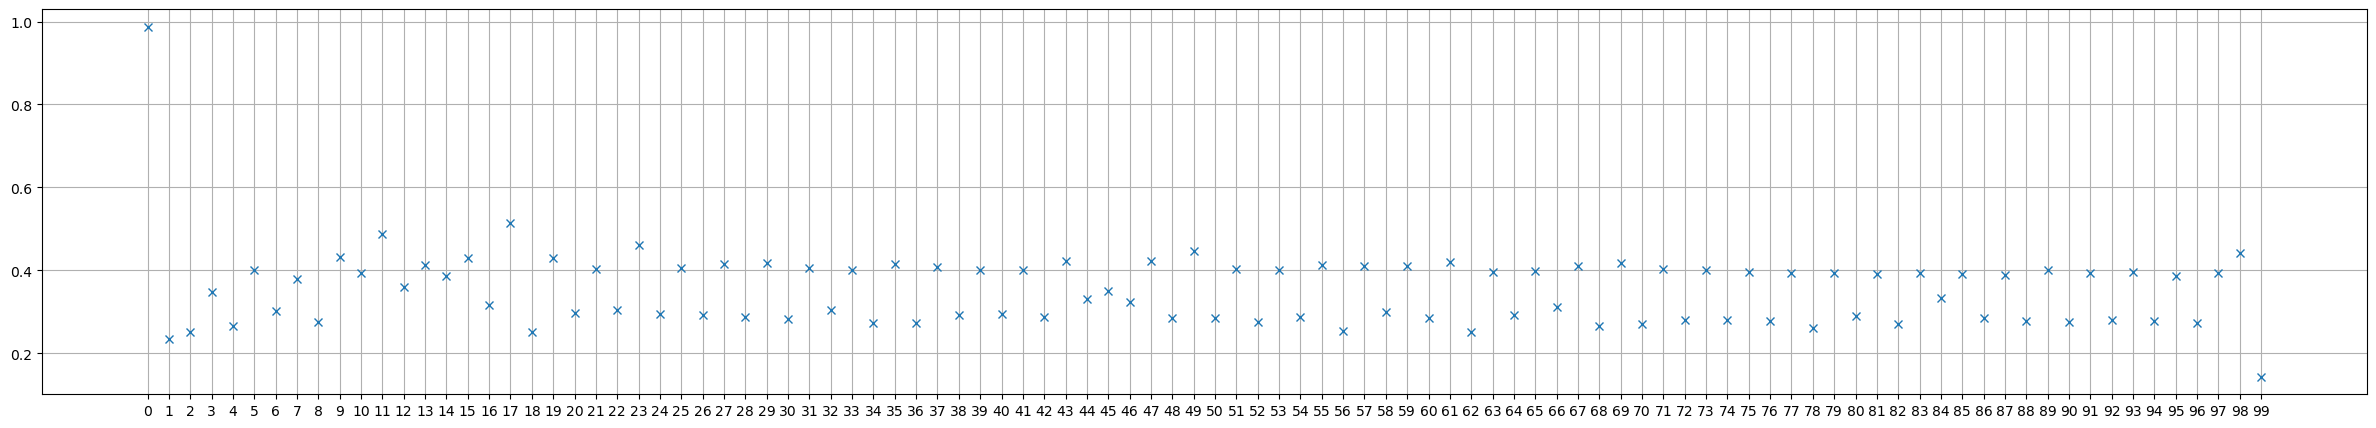

In [44]:
t0 = time()
delta_t = []
for x in kids_dset.take(100):
    t1 = time()
    delta_t.append(t1 - t0)
    t0 = t1

fig, ax = plt.subplots(figsize=(30, 5))
ax.plot(delta_t, marker="x", linestyle="")
ax.set_xticks(np.arange(len(delta_t)))
ax.grid(True)

# comparison

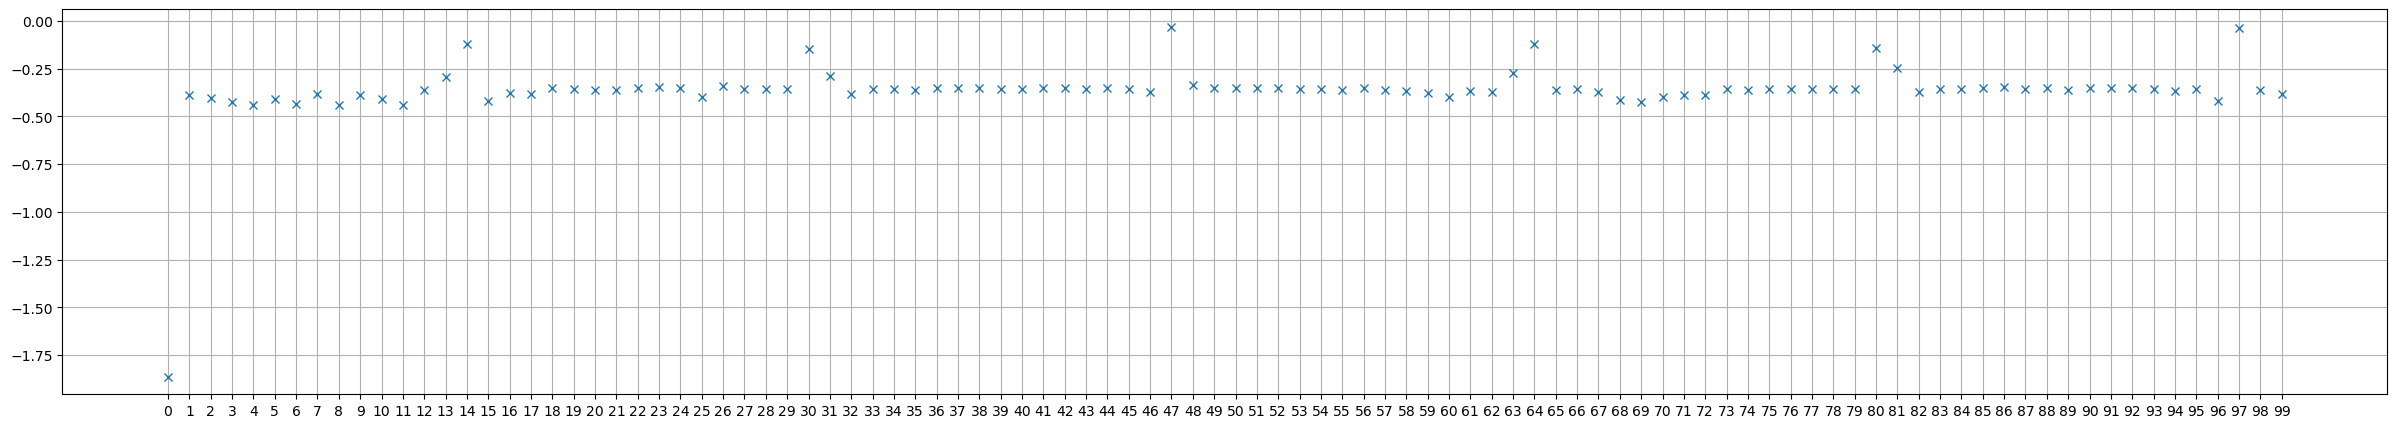

In [24]:
t0 = time()
delta_t = []
for x in my_dset.take(100):
    t1 = time()
    delta_t.append(t1 - t0)
    t0 = t1

fig, ax = plt.subplots(figsize=(30, 5))
ax.plot(delta_t, marker="x", linestyle="")
ax.set_xticks(np.arange(len(delta_t)))
ax.grid(True)

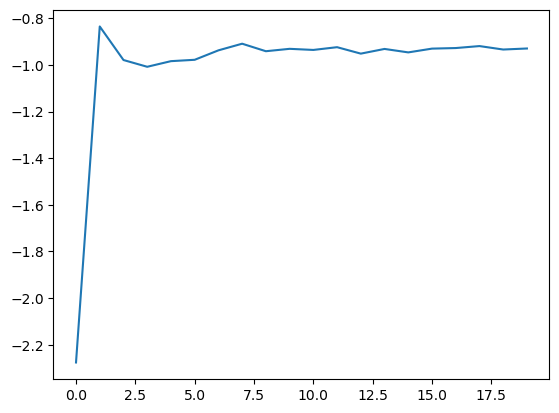

In [13]:
t0 = time()
delta_t = []
for x in kids_dset.take(20):
    t1 = time()
    delta_t.append(t1 - t0)
    t0 = t1

plt.plot(delta_t, marker="x")

([<matplotlib.axis.XTick at 0x280c53d90>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

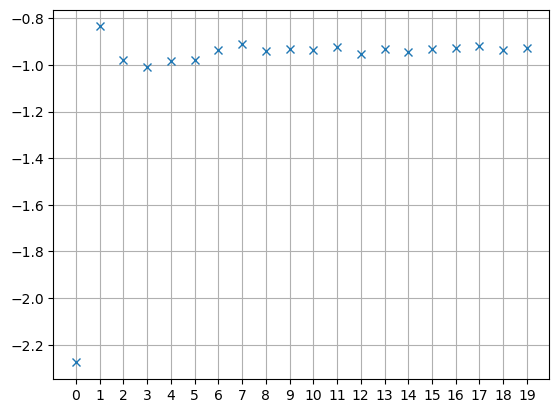

In [17]:
plt.plot(delta_t, marker="x", linestyle="")
plt.grid(True)
plt.xticks(np.arange(len(delta_t)))